<a href="https://colab.research.google.com/github/tathagatanandy/networktraffic/blob/main/K_means_Gaussianmix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
import pandas as pd

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
pwd

'/content'

In [ ]:
## If you are using the data by mounting the google drive, use the following : If not using Google drive , please comment this
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/content/gdrive/MyDrive/upgrad-assignment/MSLJMU')

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))


Current working directory: /content
Current working directory: /content/gdrive/MyDrive/upgrad-assignment/MSLJMU


In [ ]:
data= pd.read_csv("App-data-87.csv")
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Lets analyze the flow data
for col in data.columns:
    print(col)

Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
 data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Make the Dst Port as the Smaller value as Ephieral ports are always the larger  values
data= pd.read_csv("App-data-87.csv")
s = data['Destination.Port'] > data['Source.Port']
data.loc[s, ['Source.IP','Destination.IP']] = data.loc[s, ['Destination.IP','Source.IP']].values
data.loc[s, ['Destination.Port','Source.Port']] = data.loc[s, ['Source.Port','Destination.Port']].values

In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,192.168.90.114,59240,10.200.7.5,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,192.168.42.57,62632,10.200.7.5,3128,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,192.168.90.70,52166,10.200.7.5,3128,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,192.168.180.14,34478,10.200.7.5,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
#convert the Source and Destination IP to numeric
import ipaddress
data['Source.IP'] = data['Source.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination.IP'] = data['Destination.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))



In [ ]:
#print(data['int_network'])
print(data['Source.IP'])
print(data['Destination.IP'])



0          2886926638
1          2886926638
2           180881369
3           180881369
4          3232253995
              ...    
1048570    3232258674
1048571    3232246329
1048572    3232258630
1048573    3232281614
1048574    3232281614
Name: Source.IP, Length: 1048575, dtype: int64
0          180881159
1          180881159
2          840939815
3          840939815
4          180881159
             ...    
1048570    180881157
1048571    180881157
1048572    180881157
1048573    180881157
1048574    180881157
Name: Destination.IP, Length: 1048575, dtype: int64


# Drop Unwanted Columns

In [ ]:
data = data.drop('Label', axis=1)



In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,3232258674,59240,180881157,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,3232246329,62632,180881157,3128,6,27/04/201711:33:43,74700026,12,1,...,138.0,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,3232258630,52166,180881157,3128,6,27/04/201711:32:47,76789744,19,2,...,9299.0,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,3232281614,34478,180881157,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data = data.drop('ProtocolName', axis=1)


In [ ]:

data= data.drop('Fwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Fwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Fwd.Avg.Bulk.Rate',axis =1)
data= data.drop('Bwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Bwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Bwd.Avg.Bulk.Rate',axis =1)
data= data.drop('CWE.Flag.Count',axis =1)

data= data.drop('Bwd.PSH.Flags',axis =1)
data= data.drop('Fwd.URG.Flags',axis =1)
data= data.drop('Bwd.URG.Flags',axis =1)



In [ ]:
# There are multiple columns with the Same ID.. We need to merge them to a Single Row with other values as average 
## of all the Same columns

data1 = data.groupby('Flow.ID').mean().reset_index()
data1

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
0,10.130.10.158-10.200.7.8-51072-3128-6,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
1,10.130.10.191-10.200.7.6-49585-3128-6,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,10.130.10.191-10.200.7.7-50603-3128-6,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
3,10.130.10.191-10.200.7.7-50604-3128-6,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
4,10.130.10.191-10.200.7.7-50605-3128-6,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,8.43.72.98-10.200.7.218-80-54243-6,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,...,32.0,740849.0,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0
442479,8.43.72.98-10.200.7.218-80-54449-6,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442480,8.43.72.98-10.200.7.218-80-54457-6,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442481,8.43.72.98-10.200.7.218-80-56047-6,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [ ]:
data = data1.drop('Flow.ID', axis=1)

In [ ]:
#my_data = pd.to_numeric(data)
mydata = data.apply(pd.to_numeric) # convert all columns of DataFrame

In [ ]:
mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64


In [ ]:
mydata

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,16093.0,...,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0,2.084781e+07,3.459495e+08
442479,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,4189.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.817757e+06,8.317277e+08
442480,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,1735.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.718756e+06,4.411331e+08
442481,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,4254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.525014e+06,3.310524e+08


In [ ]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

## Now we have reduced Rows will use PCA to reduce the number of Columns
## The Idea is to do clustering and then put the data back into the cluster and see if the cluster is based on
## 1. Application ID, 2. Volume > X , 3. Source IP, 4. Source-IP-Dst IP , 5. Source-IP-Dst Port , 6. Dst-IP-Dst Port , 7. Source IP-Application ID,
## 8. Source-IP-DstIP-Application ID , 9. Source IP-Volume 10. Src IP-Dst IP-Dst Port - Apploction ID
## This Action will be done for all the Clustering algorithm once we identify the best one. We will not decidde a Clustering algorithm
## as better compared to other. We will try and get a good clustering Algorithm for all the types and see which parameter is best for Clustering

## The next step after finding the combination which is best for Clutering , we will filter the results on some  Src-IP or Dst IP or Application Name to see if a partucular client or Server or an Application has anomalous pattern.


In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.864318,0.260207,-0.888809,0.908762,-0.011004,-0.615518,-0.062263,-0.054776,-0.024997,-0.046479,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.638001,-0.051726,-0.154444
1,-0.864318,0.138412,-0.888809,0.908762,-0.011004,-0.615820,-0.062263,-0.062112,-0.023776,-0.047617,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051733,-0.154446
2,-0.864318,0.221793,-0.888809,0.908762,-0.011004,-0.615924,-0.060754,-0.053553,-0.024826,-0.045754,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.292895,-0.051715,-0.154443
3,-0.864318,0.221875,-0.888809,0.908762,-0.011004,-0.615896,-0.060754,-0.054776,-0.024858,-0.045956,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.435910,-0.051718,-0.154443
4,-0.864318,0.221957,-0.888809,0.908762,-0.011004,-0.616006,-0.063017,-0.059055,-0.024992,-0.047250,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.270247,-0.051613,-0.153553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,-0.861252,0.519933,-0.921801,-1.005425,-0.011004,1.748831,-0.028324,-0.012590,0.000204,-0.039184,...,-0.141904,0.281373,0.519740,1.998755,-0.242574,1.801023,2.188724,-1.895416,-0.051590,-0.047418
442479,-0.861252,0.536805,-0.921801,-1.005425,-0.011004,0.622970,-0.052458,-0.044993,-0.017784,-0.045421,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051701,0.102870
442480,-0.861252,0.537461,-0.921801,-1.005425,-0.011004,0.599234,-0.059246,-0.054164,-0.021493,-0.046707,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051723,-0.017971
442481,-0.861252,0.667692,-0.921801,-1.005425,-0.011004,0.606723,-0.057738,-0.051107,-0.020409,-0.045388,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051710,-0.052027


<Axes: >

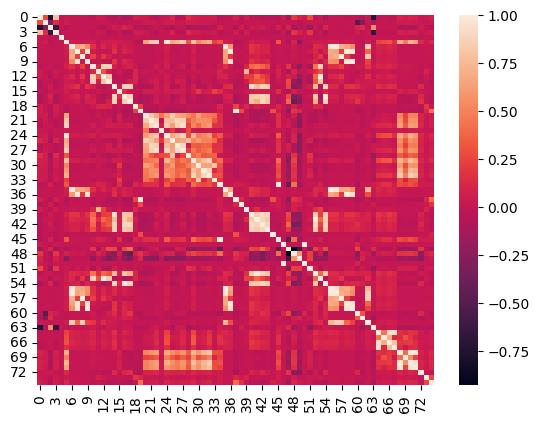

In [ ]:
sns.heatmap(scaled_data.corr())

## When applying PCA to a dataset, one golden rule always exists , Select the best number of principal components while keeping as much of the variance in the original data as possible.

Method 3: Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components.
This is the most advanced and effective method that can be used to select the best number of principal components for the dataset.

In this method, we create the following type of plot.

In this method, we create the following type of plot.


The percentage of total variance captured by the principal components (Image by author)
The number of bars is equal to the number of variables in the original dataset. In this plot, each bar shows the explained variance percentage of individual components and the step plot shows the cumulative explained variance percentages.

By looking at this plot, we can easily decide how many components should be kept. In this example, only the first two components capture almost all the variance in the dataset. So, we decide to select only the first two components.

To get the Python code for creating the above type of plot, please refer to the 15th Question of my “Principal Component Analysis — 18 Questions Answered” article.

According to Kaiser’s rule, all the components with eigenvalues greater than 1 should be kept for statistical inference. The reasoning behind Kaiser’s rule is that any principal component retained should explain the variance at least as much as an original standardized variable. 

In [ ]:
## Select the ideal number of componnets
import numpy as np

pca = PCA(n_components=18)
 
pca.fit_transform(scaled_data)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

print("variance in %",(prop_var*100))
print("Sum is",np.sum(prop_var))
print("type", type(prop_var))
print("eigenvalues",eigenvalues)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)
print(prop_var*100)
print(np.sum(prop_var))
                             
                                


variance in % [15.06047335 12.84287048  9.81121216  5.65893093  5.14207863  4.44379075
  3.7321303   3.54955619  3.15767214  2.69454873  2.4195776   2.32963132
  2.29425452  2.0966054   2.06482898  1.70672916  1.47150663  1.44907832]
Sum is 0.8192547560316548
type <class 'numpy.ndarray'>
eigenvalues [11.29538054  9.63217463  7.35842575  4.24420779  3.85656769  3.3328506
  2.79910405  2.66217316  2.36825946  2.02091611  1.8146873   1.74722744
  1.72069478  1.57245761  1.54862524  1.28004976  1.10363246  1.0868112 ]
[18.38313814 15.67628431 11.97577687  6.90741297  6.27653193  5.4241867
  4.55551863  4.33266473  3.85432262  3.28902421  2.95338854  2.84359816
  2.80041648  2.55916171  2.52037473  2.08327037  1.79615268  1.76877621]
1.0


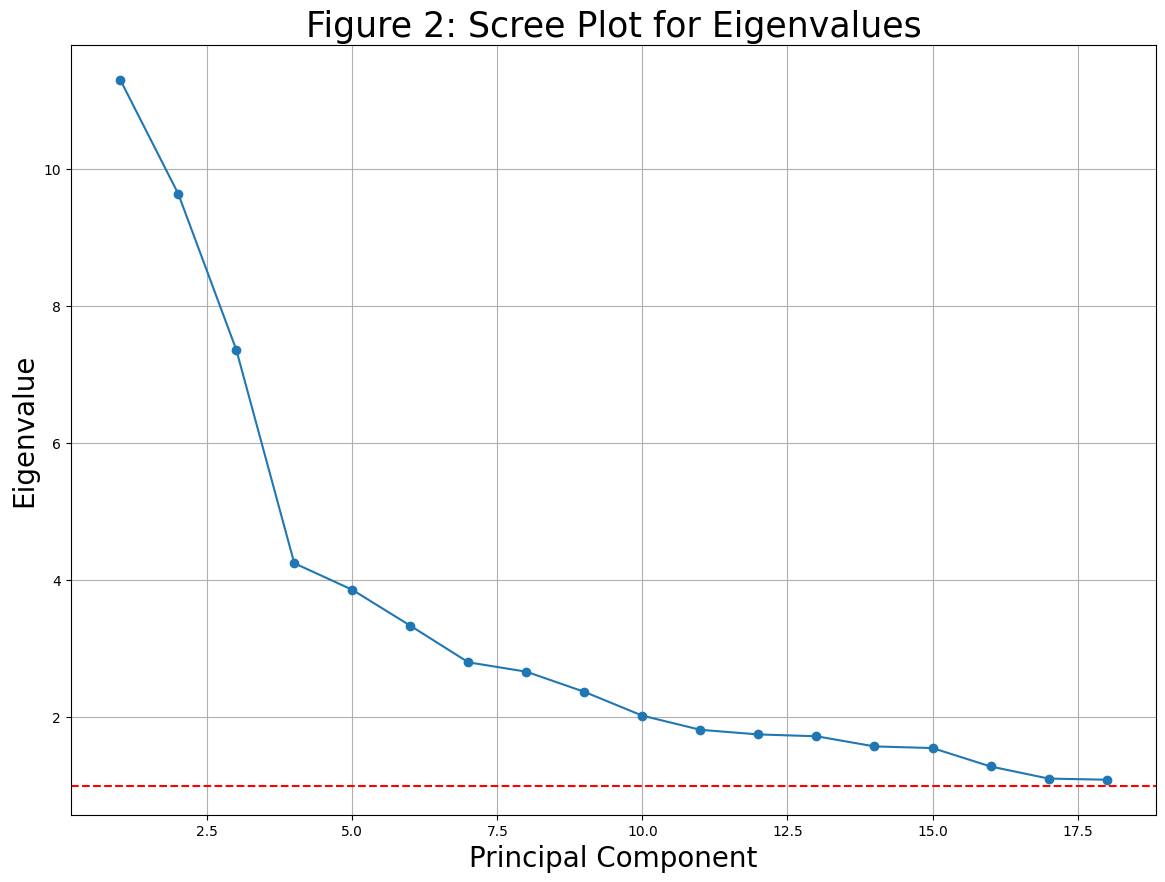

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(eigenvalues)+1), 
         eigenvalues, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Eigenvalue',
           size = 20)
plt.title('Figure 2: Scree Plot for Eigenvalues',
          size = 25)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.grid(True)

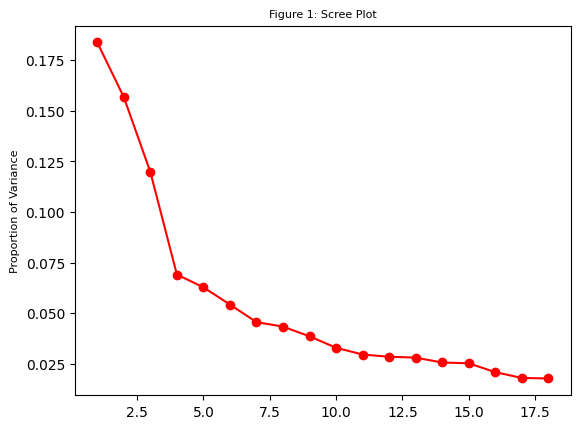

In [ ]:
## 18 have eigen value greater than 1 and covers variance.  We will choose 18 as the ideal number of Principal components for our Analysis
import matplotlib.pyplot as plt
import plotly.graph_objects as go
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [ ]:
# We choose 18 components and do the PCA on them
pca = PCA(n_components = 18)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.901801,0.199577,-0.548425,0.858520,0.194395,1.206951,0.287648,0.974612,0.113037,-0.242046,-0.528902,0.544787,0.594625,-0.046976,1.336948,0.264854,0.122400,0.184119
1,-1.738461,-0.019707,0.186336,-2.930895,0.539924,0.924625,-1.496770,0.557624,-0.455773,-0.084787,-0.640940,0.330279,-0.269878,-0.832217,-0.712427,-0.303395,0.071422,0.075678
2,-1.858123,0.670167,-0.948410,0.716698,0.234987,1.306547,0.233621,0.965274,0.127436,-0.228989,-0.658632,0.739791,0.712566,-0.158970,1.777081,0.547885,0.036490,0.184002
3,-1.859435,0.716699,-1.008179,0.822319,0.210760,1.316272,0.291260,0.960417,0.133114,-0.228662,-0.657553,0.747953,0.736453,-0.156209,1.846811,0.574355,0.024376,0.182853
4,-2.008487,-1.663799,1.523392,-0.047564,-2.097640,-0.020648,0.175280,-1.263502,3.748404,-0.007365,-0.445495,0.733227,-0.272229,-0.212404,0.049041,-0.490364,-0.560938,-0.897801


<Axes: >

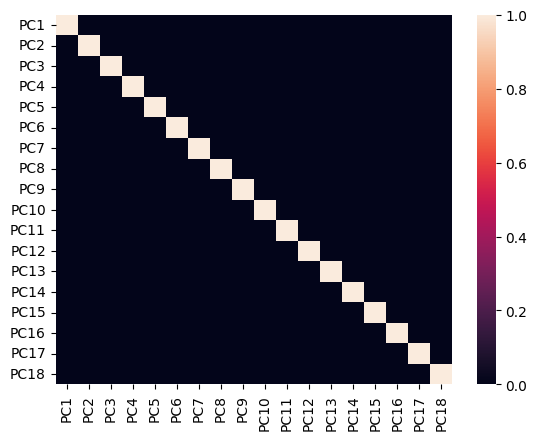

In [ ]:
sns.heatmap(data_pca.corr())

In [ ]:
x = data_pca.iloc[:,0:17] # 1t for rows and second for columns
x


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.901801,0.199577,-0.548425,0.858520,0.194395,1.206951,0.287648,0.974612,0.113037,-0.242046,-0.528902,0.544787,0.594625,-0.046976,1.336948,0.264854,0.122400
1,-1.738461,-0.019707,0.186336,-2.930895,0.539924,0.924625,-1.496770,0.557624,-0.455773,-0.084787,-0.640940,0.330279,-0.269878,-0.832217,-0.712427,-0.303395,0.071422
2,-1.858123,0.670167,-0.948410,0.716698,0.234987,1.306547,0.233621,0.965274,0.127436,-0.228989,-0.658632,0.739791,0.712566,-0.158970,1.777081,0.547885,0.036490
3,-1.859435,0.716699,-1.008179,0.822319,0.210760,1.316272,0.291260,0.960417,0.133114,-0.228662,-0.657553,0.747953,0.736453,-0.156209,1.846811,0.574355,0.024376
4,-2.008487,-1.663799,1.523392,-0.047564,-2.097640,-0.020648,0.175280,-1.263502,3.748404,-0.007365,-0.445495,0.733227,-0.272229,-0.212404,0.049041,-0.490364,-0.560938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,3.932527,0.312532,-0.074227,-2.709704,-0.328720,-1.202633,-0.936816,-0.107203,-0.881799,0.018508,-1.065430,-1.552429,-1.405829,1.390772,-3.246895,-1.060167,-0.952863
442479,0.286940,0.121249,-0.145474,-1.778653,1.330987,-0.034113,-1.129535,-0.280581,0.278024,-0.203658,0.656299,-1.659282,-0.144453,0.008910,-2.627855,-0.508128,0.509915
442480,0.608971,0.069584,-0.235356,-1.664421,1.699711,0.133386,-1.178796,-0.275930,0.419354,-0.273589,0.891833,-1.653540,0.127706,-0.147993,-2.647582,-0.627446,0.397262
442481,0.470771,0.444487,-0.494915,-1.760102,1.413088,0.168177,-1.173682,-0.302813,0.271178,-0.277298,0.798409,-1.722894,0.114150,-0.040715,-2.771383,-0.569303,0.432909


## We will Use the Following method to determine the ideal K for the  K-means algorithm
Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters.

The Silhouette Coefficient of a sample measures the average distance of a sample with all other points in the next nearest cluster against all other points in its cluster. A higher ratio signifies the cluster is far away from its nearest cluster and that the cluster is more well-defined.


Calinski-Harabasz Index
Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.

The Calinski-Harabasz Index, or Variance Ratio Criterion, measures the sum of between-cluster dispersion against the sum of within-cluster dispersion, where dispersion is the sum of distance squared.

A higher ratio signifies the cluster is far away from its other clusters and that the cluster is more well-defined. 




Davies-Bouldin Index
Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.

The Davies-Bouldin Index measures the average similarity between clusters, where similarity compares the size of clusters against the between-cluster distance.

A lower score means that the cluster is relatively small compared to the distance to another cluster, hence well-defined.

In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(x)
    sum_of_squared_distances.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

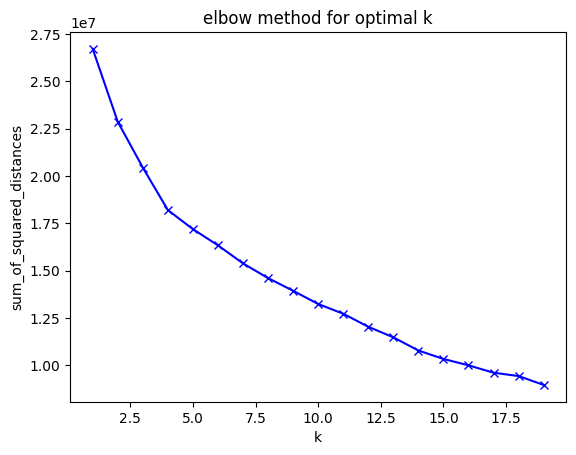

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

# Check the ideal K
We will Use K values from 4 to 9 to get the ideal value of K in this algorithm

In [ ]:
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=x
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
y_hat_4 = k_means_4.predict(X)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.34426955509680707
69007.18856091204
1.3291499419757031


In [ ]:
type(X)

pandas.core.frame.DataFrame

[1 1 1 ... 1 1 1]


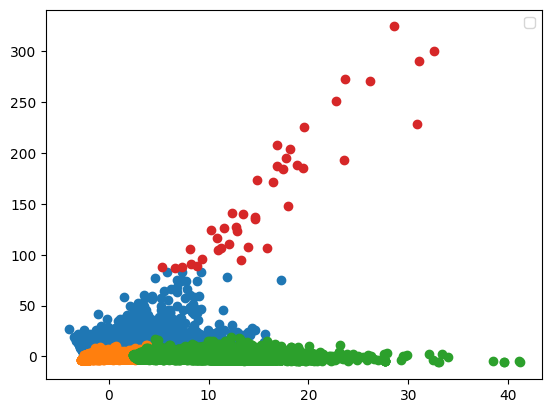

In [ ]:
kmeans_label = y_hat_4
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

K Means Cluster Analysis

## For the Overall Data

## Lets analyze the top 10 flows by applications 


## Lets analyze the top 10 flows by volume (Flow.Duration in Seconds * Flow bytes per second)


## Lets analyze the top 10 clients by session (Check which clients are chatty)

## Top 10 Clients per Volume (Check which applications are chatty)


## Same analysis per Clusters

## Final Analysis - Which parameters are most important for clustering
## Is the Clusters can be associated to a QOS
## Can the clusters be used for DPI tool
## Can the Clusters be used for Resource Allocation in Hardware
## Is the solution seamless for Encrypted Traffic
## Is the solution seamless for Encapsulated/DCN/Campus networks








In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(y_hat_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({1: 316172, 2: 65038, 0: 61232, 3: 41})


First 3 clusters only explains all the variations. We will treat Cluster 3 as Outliers and check what exactly it has
Before that Some analysis on the Original Data Set only.
Note that we have merged the Dataset based on Flow ID. Thereby multiple rows are merged to one

In [ ]:
## Top Sessions by L7 Protocol
print("Sessions by L7 Protocol")
overall_data_countrer_l7 = collections.Counter(mydata['L7Protocol'])
print(overall_data_countrer_l7)

Sessions by L7 Protocol
Counter({126.0: 105340, 91.0: 67033, 7.0: 58771, 131.0: 44478, 130.0: 25315, 124.0: 21629, 212.0: 10882, 178.0: 8399, 68.5: 8283, 69.0: 6217, 66.5: 6090, 147.0: 5727, 37.75: 4668, 70.0: 3688, 125.0: 3572, 38.0: 3099, 119.0: 3037, 36.75: 2975, 122.0: 2930, 120.0: 2494, 68.0: 2423, 220.0: 2256, 65.5: 1846, 48.0: 1763, 86.33333333333333: 1678, 121.0: 1674, 89.0: 1660, 48.333333333333336: 1481, 78.4: 1481, 46.666666666666664: 1409, 109.5: 1112, 40.0: 1021, 140.0: 964, 36.25: 958, 89.66666666666667: 919, 96.25: 783, 77.0: 773, 56.2: 744, 219.0: 725, 211.0: 614, 80.8: 613, 54.6: 608, 53.666666666666664: 582, 38.5: 558, 99.25: 532, 221.0: 447, 139.0: 412, 58.25: 408, 31.6: 399, 100.0: 369, 42.0: 355, 46.0: 354, 64.0: 344, 133.0: 344, 56.6: 339, 85.0: 335, 142.0: 333, 102.2: 321, 22.75: 307, 75.33333333333333: 306, 176.0: 290, 128.5: 283, 77.28571428571429: 279, 81.4: 277, 58.0: 258, 143.0: 253, 66.0: 253, 92.5: 248, 75.0: 227, 92.0: 216, 179.0: 210, 63.5: 206, 136.3333

In [ ]:
## Top Entries by Client IP
print("Session entries by Source IP")
overall_data_countrer_sip = collections.Counter(mydata['Source.IP'])
print(overall_data_countrer_sip)

Session entries by Source IP
Counter({180881369.0: 44674, 180881351.0: 39480, 180881347.0: 38069, 180881370.0: 37477, 180881346.0: 36596, 180881348.0: 33349, 180881159.0: 5086, 3232281614.0: 4465, 3232254040.0: 3361, 180881157.0: 3014, 3232258674.0: 2722, 3232258625.0: 2572, 3232253995.0: 2571, 3232238145.0: 2244, 3232281637.0: 2045, 180881160.0: 1967, 180881161.0: 1866, 3232253983.0: 1601, 3232245798.0: 1521, 3232238117.0: 1518, 180881158.0: 1500, 180881156.0: 1499, 2886926637.0: 1454, 3232281616.0: 1436, 2886926628.0: 1413, 3232238160.0: 1407, 2886926622.0: 1310, 3232254003.0: 1279, 3232238119.0: 1257, 3232274184.0: 1248, 182845752.0: 1182, 3232245802.0: 1170, 3232264206.0: 1140, 182845769.0: 1131, 3232281652.0: 1097, 3232268841.0: 1091, 3232246385.0: 1086, 3232258570.0: 1075, 3232274185.0: 1037, 3232256281.0: 1012, 3232258698.0: 971, 2886926627.0: 927, 3232245790.0: 926, 3232242985.0: 922, 3232268802.0: 903, 3232258590.0: 887, 3232248858.0: 872, 3232269075.0: 857, 3232246334.0: 857,

In [ ]:
# Top Entries my Destination IP
print("Session entries by Destination IP")
overall_data_countrer_dip = collections.Counter(mydata['Destination.IP'])
print(overall_data_countrer_dip)

Session entries by Destination IP
Counter({180881160.0: 35746, 180881157.0: 35205, 180881159.0: 34224, 180881156.0: 32976, 180881161.0: 31759, 180881158.0: 27756, 3488895158.0: 8282, 3003188434.0: 5374, 1750834412.0: 5358, 3003188455.0: 5070, 3003188468.0: 5049, 3003188440.0: 5016, 3003188461.0: 4850, 3003188454.0: 4820, 3003188441.0: 4770, 3003188475.0: 4743, 3003188469.0: 4701, 3003188462.0: 4673, 3003188448.0: 4544, 3003188447.0: 4537, 3232281637.0: 2757, 2899909953.0: 1837, 3627731682.0: 1648, 3627731681.0: 1561, 2899910146.0: 1466, 643490315.0: 1382, 3627736642.0: 1255, 2899910145.0: 1240, 225117234.0: 1223, 2899909922.0: 1204, 1089059517.0: 1113, 169084084.0: 1082, 643490316.0: 1069, 3589263173.0: 1065, 3627736674.0: 1015, 2899909954.0: 991, 225126923.0: 957, 643490317.0: 955, 3232274178.0: 947, 3232291845.0: 942, 1089060541.0: 932, 3627736673.0: 912, 1611073902.0: 865, 386478863.0: 833, 3627731690.0: 822, 2899910154.0: 743, 1168955503.0: 713, 3627736641.0: 672, 392336990.0: 640,

Create additional column for Volume in Bytes and Packets. These are useful as most sampled solutions provide this data

In [ ]:
## Get volume in the mydata. Volume in bytes = Duration in millisecod*bytes per seconds/100

mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])
## Create Two Data Frames from the Original , one sorted with bytes and one sorted with packets

sorted_data_bytes = mydata.sort_values(by=['volume_in_bytes_psec'], ascending=False)
print(sorted_data_bytes)

sorted_data_packets = mydata.sort_values(by=['volume_in_packets_psec'], ascending=False)

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64
           Source.IP  Source.Port  Destination.IP  Destination.Port  Protocol  \
226160  3.232238e+09      51405.0    1.808812e+08            3128.0       6.0   
407778  1.808814e+08      55779.0    3.246174e+09              80.0       6.0   
437476  1.808814e+08      44592.0    3.627737e+09              80.0       6.0   
237997  3.232238e+09      52138.0    1.808812e+08 

In [ ]:
## Lets see the Top 10 guys based on Volume as to which App they belong

## Top 10 by Packets
print(sorted_data_packets[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(10))
## In the Top 10 results L4 Protocols and Destination Ports are typically same , we can remove one of them.  What impacts most , 
## Is there a particular client which is chatty or a particular application. 

## Top 10 entries by Volume in packets has mostly sent to Application 126 and 125 which are skype and google. Although SSL packets themselves was the
## highest

           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
108436  1.808814e+08    2.539996e+09        91.0             443.0   
379928  3.232256e+09    1.808812e+08       125.0            3128.0   
266427  3.232272e+09    1.808812e+08       126.0            3128.0   
267507  3.232272e+09    1.808812e+08        77.0            3128.0   
97574   1.828459e+08    1.808812e+08       126.0            3128.0   
97577   1.828459e+08    1.808812e+08       126.0            3128.0   
97576   1.828459e+08    1.808812e+08       126.0            3128.0   
97575   1.828459e+08    1.808812e+08       126.0            3128.0   
97624   1.828459e+08    1.808812e+08       126.0            3128.0   
90284   1.808814e+08    1.541711e+09         7.0              80.0   

        volume_in_bytes_psec  Flow.Duration  
108436          1.930394e+12     39395801.0  
379928          1.290305e+13     59461046.5  
266427          5.273181e+11     58590596.5  
267507          5.147806e+11     42895491.5  

In [ ]:
sorted_data_duration = mydata.sort_values(by=['Flow.Duration'], ascending=False)
print(sorted_data_duration[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(20))
## Top 10 by Duration does not have 131 (Proxy), which means they are generally small duration. Large duration session were 126
## 211- Instagra 212- MS, 125- Skype , MSN


           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
203225  1.808813e+08    3.003188e+09       126.0             443.0   
218528  1.808814e+08    3.193634e+09       211.0             443.0   
183313  1.808813e+08    3.003188e+09       126.0             443.0   
97584   1.828459e+08    1.808812e+08       126.0            3128.0   
337178  3.232246e+09    1.808812e+08        68.0            3128.0   
97925   1.828458e+08    1.808812e+08         7.0            3128.0   
17520   1.808813e+08    1.758470e+09       212.0             443.0   
309256  3.232244e+09    1.808812e+08       212.0            3128.0   
241279  3.232238e+09    1.808812e+08       126.0            3128.0   
20316   1.808813e+08    2.251171e+08       125.0             443.0   
280276  3.232282e+09    1.808812e+08       126.0            3128.0   
382661  3.232256e+09    1.808812e+08       126.0            3128.0   
93852   1.828459e+08    1.808812e+08       131.0            3128.0   
362566  3.232254e+09

Next we will take only a subset of parameters that we think is important and do K-Means based on them and check whether the results are similar

## This will be done in later part of analysis once base results are obtained with the original Data



In [ ]:

newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
#newmydata_packets = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_packets_psec','Flow.Duration']].copy()

We see the following patterns in the Original Dataframe
There are large size packets in a session
There are large duration sessions
There are small duration sessions
There are small size packets in a session
There are different applications - Video (Youtube , Skype , Google, MSN etc)
One client is more chatty then others.
Some client might be using some applications


Clusters Analyzed will be K-Means only. We would see in the 4 Clusters on what parameters that clusters are formed by comparing two clusters. 


In the second experiment , we will create the K-means without PCA and with only the 5-6 Columns and see the patterns in the Cluster.  This can be repeated with one or two more but we would conclude.


Optional - Hierarchical clsuters can be tried to see if the same pattern exist in the Clusters.

Fuzzy C Means will be experimented for the similar excercise to see if the results are same as till now very less results available for Fuzzy C-Means for IP FLow Classification



Recommendation will be based on the Results obtained with some domain knowledge added to it. 



In [ ]:
mydata['pLabel'] = y_hat_4

label0_df_kmeans = mydata.loc[mydata['pLabel'] == 0]
label0_df_kmeans

label1_df_kmeans = mydata.loc[mydata['pLabel'] == 1]
label1_df_kmeans

label2_df_kmeans = mydata.loc[mydata['pLabel'] == 2]
label2_df_kmeans

label3_df_kmeans = mydata.loc[mydata['pLabel'] == 3]
label3_df_kmeans




print(len(label0_df_kmeans))
print(len(label1_df_kmeans))
print(len(label2_df_kmeans))
print(len(label3_df_kmeans))

61232
316172
65038
41


In [ ]:
## Analysis
 
print("Cluster Distribution")

print("cluster 0 % elements",len(label0_df_kmeans)*100/len(mydata))
print("cluster 1 % elements",len(label1_df_kmeans)*100/len(mydata))
print("cluster 2 % elements",len(label2_df_kmeans)*100/len(mydata))
print("cluster 3 % elements",len(label3_df_kmeans)*100/len(mydata))

Cluster Distribution
cluster 0 % elements 13.838271752813103
cluster 1 % elements 71.45404456216397
cluster 2 % elements 14.698417792321965
cluster 3 % elements 0.009265892700962524


## Calculation of weights of each column in the Cluster

THis will be repeated for all Clusters

This approach is model-agnostic; Not exclusive to K-Means, in which we convert the unsupervised clustering problem into a One-vs-All supervised classification problem using an easily interpretable classifier such as tree-based models. The steps to do this are as follows:

Change the cluster labels into One-vs-All binary labels for each
Train a classifier to discriminate between each cluster and all other clusters
Extract the feature importances from the model (We will be using sklearn.ensemble.RandomForestClassifier)

In [ ]:
## Label 1 has highest elements , so well take those weights only for Gaussian
## Cluster 1
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 1    316172
0    126311
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Flow.Duration', 0.09903820413574033),
 ('Fwd.IAT.Total', 0.09246971194233426),
 ('Packet.Length.Std', 0.09243021808792817),
 ('Max.Packet.Length', 0.07854960007064636),
 ('Packet.Length.Variance', 0.05582664487293173),
 ('Idle.Max', 0.047210847905321145),
 ('Idle.Mean', 0.04137061823966147),
 ('Bwd.Packet.Length.Mean', 0.040905532874585135),
 ('Average.Packet.Size', 0.03993319841242488),
 ('Bwd.Packet.Length.Max', 0.03773200275531411),
 ('Flow.IAT.Max', 0.03170066583629579),
 ('Bwd.IAT.Total', 0.02788440020157672),
 ('Avg.Bwd.Segment.Size', 0.023792967117652494),
 ('Packet.Length.Mean', 0.02337910393716342),
 ('Fwd.IAT.Max', 0.01976093318861156),
 ('Flow.IAT.Std', 0.018012000051009884),
 ('Flow.IAT.Mean', 0.016787528620165984),
 ('Bwd.Packet.Length.Std', 0.01647464346301722),
 ('Bwd.IAT.Max', 0.012551660943226677),
 ('Fwd.IAT.Std', 0.011339582633979639),
 ('Idle.Min', 0.011216016036538375),
 ('Fwd.IAT.Mean', 0.010988792481660879),
 ('Idle.Std', 0.010652148775179062),
 ('Total.Length

In [ ]:
## Will Take the top 5 features and will do Gaussian with it along with top 5 features of Gaussian Cluster

##'Flow.Duration', 0.1004768825124559),
## ('Packet.Length.Std', 0.09793475822622771),
## ('Fwd.IAT.Total', 0.09257847171852321),
## ('Max.Packet.Length', 0.07607553140711078),
## ('Packet.Length.Variance', 0.050197168454593204),
## ('Idle.Max', 0.0495771263302449),
## ('Average.Packet.Size', 0.043430493600944434),

## Top 7 of Gaussian 

#('Bwd.IAT.Total', 0.06484712635136297),
# ('Flow.Packets.s', 0.055140555331667444),
# ('Bwd.IAT.Max', 0.05389168650757747),
# ('volume_in_bytes_psec', 0.052130821225025284),
# ('Fwd.Packets.s', 0.05119367917918519),
# ('Bwd.IAT.Std', 0.045180188547193516),
# ('Bwd.IAT.Mean', 0.044961072583587273),

In [ ]:
#Lets do K-means on reduced combined featureset of the highest cluster

newmydata_bytes = label1_df_kmeans[['Flow.Duration', 'Packet.Length.Std','Fwd.IAT.Total', 'Max.Packet.Length','Packet.Length.Variance','Idle.Max','Average.Packet.Size','Bwd.IAT.Total','Flow.Packets.s','Bwd.IAT.Max','volume_in_bytes_psec','Fwd.Packets.s','Bwd.IAT.Std','Bwd.IAT.Mean']].copy()


In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newmydata_bytes)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.590097,1.379325,-0.530739,0.931198,0.513179,-0.286086,0.545451,-0.371405,-0.326665,-0.365214,-0.085473,-0.315197,-0.323999,-0.283992
1,-0.590870,1.821462,-0.531546,0.474960,0.983472,-0.286086,1.371148,-0.373051,-0.327193,-0.367355,-0.085496,-0.314146,-0.326960,-0.287093
2,-0.591138,1.665100,-0.531826,0.928840,0.808976,-0.286086,1.191700,-0.372495,-0.319889,-0.366955,-0.085434,-0.312237,-0.326311,-0.286220
3,-0.591067,1.793931,-0.531751,0.928840,0.952099,-0.286086,1.131632,-0.372676,-0.321710,-0.366899,-0.085444,-0.312727,-0.326337,-0.286385
4,-0.591350,-0.249455,-0.532046,-0.338486,-0.397799,-0.286086,-0.473123,-0.372854,3.497782,-0.367080,-0.085084,3.633698,-0.326530,-0.286628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316167,2.532497,-0.124973,2.726618,-0.305476,-0.295850,-0.286086,-0.501413,-0.358464,-0.310945,-0.346514,-0.085513,-0.311538,-0.302089,-0.267433
316168,2.590166,0.853768,2.786795,0.548053,0.900875,-0.286086,0.722759,-0.308096,-0.224481,-0.336231,-0.085385,-0.289218,-0.299641,-0.261593
316169,2.529216,0.970525,2.723211,0.548053,1.090445,-0.286086,0.725340,-0.351345,-0.272593,-0.336233,-0.085463,-0.301638,-0.294181,-0.264339
316170,2.548446,1.146461,2.743269,0.548053,1.394943,-0.286086,1.183721,-0.351245,-0.286989,-0.336059,-0.085418,-0.305354,-0.300526,-0.272400


In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(scaled_data)
    sum_of_squared_distances.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

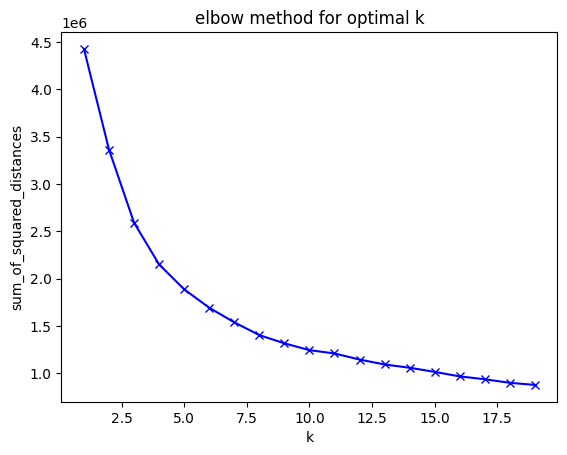

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
## Will Use Gaussian now on this with 4 Clusters 
X1=scaled_data
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=scaled_data

import pandas as pd
from sklearn.mixture import GaussianMixture


# Instantiate and fit the Gaussian Mixture model
gmm = GaussianMixture(n_components=4)
gmm.fit(X1)

# Get the cluster labels for each sample
labels = gmm.predict(X1)

# Add the cluster labels to the DataFrame
newmydata_bytes['pLabel'] = labels

X = X1
labels_4 = labels

#labels_4 = gmm.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)



0.11154668336764777
21736.676047190344
3.4196926294556262


We will use 4 as the ideal cluster size and would evaluate

[0 0 0 ... 1 1 1]


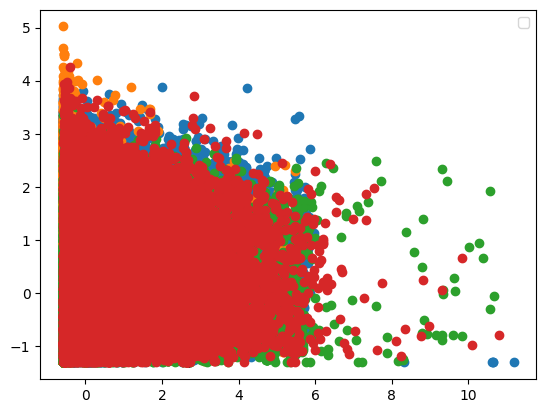

In [ ]:
kmeans_label = labels_4
df = X1
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
5#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
y_hat_4=labels_4
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(y_hat_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({0: 173826, 1: 62636, 3: 51189, 2: 28521})


In [ ]:
newmydata_bytes
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.590097,1.379325,-0.530739,0.931198,0.513179,-0.286086,0.545451,-0.371405,-0.326665,-0.365214,-0.085473,-0.315197,-0.323999,-0.283992
1,-0.590870,1.821462,-0.531546,0.474960,0.983472,-0.286086,1.371148,-0.373051,-0.327193,-0.367355,-0.085496,-0.314146,-0.326960,-0.287093
2,-0.591138,1.665100,-0.531826,0.928840,0.808976,-0.286086,1.191700,-0.372495,-0.319889,-0.366955,-0.085434,-0.312237,-0.326311,-0.286220
3,-0.591067,1.793931,-0.531751,0.928840,0.952099,-0.286086,1.131632,-0.372676,-0.321710,-0.366899,-0.085444,-0.312727,-0.326337,-0.286385
4,-0.591350,-0.249455,-0.532046,-0.338486,-0.397799,-0.286086,-0.473123,-0.372854,3.497782,-0.367080,-0.085084,3.633698,-0.326530,-0.286628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316167,2.532497,-0.124973,2.726618,-0.305476,-0.295850,-0.286086,-0.501413,-0.358464,-0.310945,-0.346514,-0.085513,-0.311538,-0.302089,-0.267433
316168,2.590166,0.853768,2.786795,0.548053,0.900875,-0.286086,0.722759,-0.308096,-0.224481,-0.336231,-0.085385,-0.289218,-0.299641,-0.261593
316169,2.529216,0.970525,2.723211,0.548053,1.090445,-0.286086,0.725340,-0.351345,-0.272593,-0.336233,-0.085463,-0.301638,-0.294181,-0.264339
316170,2.548446,1.146461,2.743269,0.548053,1.394943,-0.286086,1.183721,-0.351245,-0.286989,-0.336059,-0.085418,-0.305354,-0.300526,-0.272400


In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:1, 1:0, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 1    173826
0    142346
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'pLabel']
[11  8  9  7 10 12 13  5  4  6  1  0  3  2]
[0.01419887 0.01490986 0.01043698 0.01071345 0.03503909 0.0405443
 0.02426863 0.10579248 0.18141795 0.1504618  0.07531715 0.22399629
 0.058304   0.05459916]


[('Fwd.Packets.s', 0.22399628932557805),
 ('Flow.Packets.s', 0.18141794618043283),
 ('Bwd.IAT.Max', 0.15046179735334725),
 ('Bwd.IAT.Total', 0.10579248130807702),
 ('volume_in_bytes_psec', 0.07531714718949842),
 ('Bwd.IAT.Std', 0.05830400076438829),
 ('Bwd.IAT.Mean', 0.05459916341519121),
 ('Idle.Max', 0.040544296311660025),
 ('Packet.Length.Variance', 0.03503908601029964),
 ('Average.Packet.Size', 0.024268633601095605),
 ('Packet.Length.Std', 0.014909857493429025),
 ('Flow.Duration', 0.014198867713485757),
 ('Max.Packet.Length', 0.010713449941629018),
 ('Fwd.IAT.Total', 0.01043698339188787)]

In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:1, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    253536
1     62636
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'pLabel']
[11  8  9 13 10  7 12  4  0  6  5  1  2  3]
[0.02939732 0.02023846 0.01894324 0.01483272 0.04463725 0.02077898
 0.02929481 0.06696052 0.21226221 0.07734543 0.07295142 0.2722896
 0.04624122 0.07382682]


[('Fwd.Packets.s', 0.27228959940166075),
 ('Flow.Packets.s', 0.212262209919912),
 ('Bwd.IAT.Max', 0.07734542884085378),
 ('Bwd.IAT.Mean', 0.07382682492172125),
 ('volume_in_bytes_psec', 0.07295142242782866),
 ('Bwd.IAT.Total', 0.06696051847590836),
 ('Bwd.IAT.Std', 0.04624121699484247),
 ('Packet.Length.Variance', 0.04463724758797702),
 ('Flow.Duration', 0.029397318540165588),
 ('Average.Packet.Size', 0.029294811665452652),
 ('Idle.Max', 0.020778978082071544),
 ('Packet.Length.Std', 0.02023846489343538),
 ('Fwd.IAT.Total', 0.018943235075200796),
 ('Max.Packet.Length', 0.014832723172969532)]

In [ ]:
newmydata_bytes

,Flow.Duration,Packet.Length.Std,Fwd.IAT.Total,Max.Packet.Length,Packet.Length.Variance,Idle.Max,Average.Packet.Size,Bwd.IAT.Total,Flow.Packets.s,Bwd.IAT.Max,volume_in_bytes_psec,Fwd.Packets.s,Bwd.IAT.Std,Bwd.IAT.Mean,pLabel,Binary Cluster 0
0,14842.0,531.069179,14842.0,1773.0,282034.47270,0.0,233.700000,10376.0,6.737636e+02,9369.0,2.337000e+06,2.695055e+02,4100.362813,2075.200000,0,0
1,7466.0,618.503678,7466.0,1386.0,382546.80000,0.0,349.500000,0.0,5.357621e+02,0.0,1.398000e+06,5.357621e+02,0.000000,0.000000,0,0
2,4906.0,587.582411,4906.0,1771.0,345253.08970,0.0,324.333333,3503.0,2.445985e+03,1749.0,3.892000e+06,1.019160e+03,899.066497,583.833333,0,0
3,5585.0,613.059312,5585.0,1771.0,375841.71970,0.0,315.909091,2368.0,1.969561e+03,1992.0,3.475000e+06,8.952551e+02,862.613065,473.600000,0,0
4,2886.0,208.971170,2886.0,696.0,87337.90000,0.0,90.850000,1243.0,1.000866e+06,1203.5,1.774782e+07,1.000433e+06,595.457877,310.750000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442477,29807438.0,233.587928,29807229.0,724.0,109126.64050,0.0,86.882353,91953.5,4.784832e+03,91195.0,7.385052e+05,1.196248e+03,34439.295191,13156.214285,0,0
442479,30357650.5,427.138089,30357614.0,1448.0,364893.89395,0.0,258.566667,409458.0,2.739763e+04,136190.5,5.817757e+06,6.849480e+03,37828.838379,17063.729165,1,1
442480,29776128.5,450.227387,29776061.0,1448.0,405409.39935,0.0,258.928571,136828.0,1.481499e+04,136181.5,2.718756e+06,3.703796e+03,45389.234148,15226.638890,1,1
442481,29959606.0,485.019361,29959515.5,1448.0,470487.56160,0.0,323.214286,137462.5,1.104996e+04,136946.5,4.525014e+06,2.762539e+03,36603.131943,9832.035715,1,1


In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    287651
1     28521
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'pLabel']
[10  7 11  8  9  5 12 13  0  2  6  1  3  4]
[0.03586392 0.00925008 0.03016052 0.00836831 0.00772869 0.08601804
 0.01606167 0.14934721 0.12511414 0.08852701 0.19296432 0.14314143
 0.05424789 0.05320675]


[('volume_in_bytes_psec', 0.1929643224015752),
 ('Bwd.IAT.Total', 0.14934721192062916),
 ('Fwd.Packets.s', 0.14314142566293978),
 ('Flow.Packets.s', 0.12511414380091182),
 ('Bwd.IAT.Max', 0.08852700751340734),
 ('Idle.Max', 0.08601804268887578),
 ('Bwd.IAT.Std', 0.054247891889477026),
 ('Bwd.IAT.Mean', 0.053206753351720426),
 ('Flow.Duration', 0.03586391781027973),
 ('Fwd.IAT.Total', 0.03016052043628239),
 ('Average.Packet.Size', 0.016061672516274873),
 ('Packet.Length.Std', 0.009250084640152138),
 ('Max.Packet.Length', 0.008368310877655495),
 ('Packet.Length.Variance', 0.0077286944898188655)]

In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:0, 2:0,3:1})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    264983
1     51189
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'pLabel']
[ 9  7 12 10 11 13  8  5  0  2  6  4  1  3]
[0.03232445 0.00631927 0.03004542 0.00625351 0.00660213 0.04796345
 0.00869868 0.1918043  0.05979149 0.2500401  0.08848556 0.07889263
 0.11539901 0.07737999]


[('Bwd.IAT.Max', 0.250040096422729),
 ('Bwd.IAT.Total', 0.19180429568026805),
 ('Bwd.IAT.Std', 0.11539900752432865),
 ('volume_in_bytes_psec', 0.088485559302094),
 ('Fwd.Packets.s', 0.07889263351200164),
 ('Bwd.IAT.Mean', 0.07737999361911208),
 ('Flow.Packets.s', 0.05979149486435084),
 ('Idle.Max', 0.047963445283548164),
 ('Flow.Duration', 0.03232444910471597),
 ('Fwd.IAT.Total', 0.030045423938930716),
 ('Average.Packet.Size', 0.008698682570761186),
 ('Packet.Length.Variance', 0.006602129064316824),
 ('Packet.Length.Std', 0.0063192744122880775),
 ('Max.Packet.Length', 0.00625351470055474)]